In [1]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import sys
sys.path.append('~/PycharmProjects/feedforwardNet/')
import ffnet



pth = "/Users/gvalmerbr/Downloads/Music/"

%load_ext autoreload
%autoreload 2

Read data:

In [2]:
data,target,frm,it,desc = ffnet.loadData(pth)
data[data != 0] = np.log10(data[data !=0])+9
data[data<0]=0

Set feed forward network dimensions

In [53]:
nn_dim = [data.shape[1],800,400,target.shape[1]]
print nn_dim

[1707, 800, 400, 348]


Build neural net

In [4]:
ffnet.tf.reset_default_graph
pred, x, y, hidden = ffnet.create_ffnn(nn_dim)
#ffnet.sess.run(ffnet.tf.global_variables_initializer())
#p = pred.eval(feed_dict={x:data[0:1,:]})
#print p

Build cost and set optimizer

In [5]:
       # cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
#pred_do = tf.nn.dropout(pred,0.2)
cost = ffnet.tf.losses.mean_squared_error(y, pred)
#cost = ffnet.tf.metrics.mean_cosine_distance(y, pred,0)
optimizer = ffnet.tf.train.AdamOptimizer(learning_rate=opts['learning_rate']).minimize(cost)

initialize and stack up together, pred, cost and optimizer

In [6]:
init = ffnet.tf.global_variables_initializer()
ffnet.sess.run(init)
nnet ={'x':x,'y':y,'cost':cost,'optimizer':optimizer,'pred':pred}

Train!

In [50]:
opts = {'batch_size': 100,
 'display_step': 1,
 'learning_rate': 0.001,
 'training_epochs': 100}
tf = ffnet.nn_train(data,target,nnet,opts)

('Epoch:', '0001', 'cost=', '0.080590429')
('Epoch:', '0002', 'cost=', '0.080422875')
('Epoch:', '0003', 'cost=', '0.080343070')
('Epoch:', '0004', 'cost=', '0.080308039')
('Epoch:', '0005', 'cost=', '0.080132953')
('Epoch:', '0006', 'cost=', '0.080190864')
('Epoch:', '0007', 'cost=', '0.080062681')
('Epoch:', '0008', 'cost=', '0.079924947')
('Epoch:', '0009', 'cost=', '0.079964977')
('Epoch:', '0010', 'cost=', '0.079776429')
('Epoch:', '0011', 'cost=', '0.079983770')
('Epoch:', '0012', 'cost=', '0.079954421')
('Epoch:', '0013', 'cost=', '0.079732589')
('Epoch:', '0014', 'cost=', '0.079821763')
('Epoch:', '0015', 'cost=', '0.079750260')
('Epoch:', '0016', 'cost=', '0.079796460')
('Epoch:', '0017', 'cost=', '0.079479087')
('Epoch:', '0018', 'cost=', '0.079570973')
('Epoch:', '0019', 'cost=', '0.079431440')
('Epoch:', '0020', 'cost=', '0.079507327')
('Epoch:', '0021', 'cost=', '0.079468719')
('Epoch:', '0022', 'cost=', '0.079281094')
('Epoch:', '0023', 'cost=', '0.079454506')
('Epoch:', 

In [51]:
d = data[:,:]
p = pred.eval(feed_dict={x: d})

c = cost.eval(feed_dict={x: d,y:target[:,:]})
print("Cost = ",c)
print("max of pred = ",p.max())


('Cost = ', 0.077318676)
('max of pred = ', 6.8383079)


In [ ]:
ffnet.sess.run([hidden[1],hidden[2]],feed_dict={x: d})

(array([19773]), array([344]))


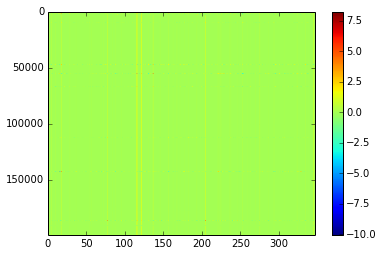

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
h=plt.imshow(p,aspect='auto')
fig.colorbar(h,orientation='vertical')
print np.nonzero(p==p.max())

In [54]:
r = pd.DataFrame(np.transpose(p[10000]),index=desc)
print r.shape
r.nlargest(18,0)

(348, 1)


,0
FLORAL,1.737434
FRUITY,1.104460
WOODY,0.848302
MUSK,0.740625
CITRUS,0.578106
GREEN,0.484053
AROMATIC,0.383286
ALDEHYDIC,0.240128
POWDERY,0.219602
ROSE,0.203341


In [ ]:
r = pd.DataFrame(np.transpose(target[10000]),index=desc)
print r.shape
r.nlargest(3,0)

In [12]:
col =ffnet.tf.get_collection(ffnet.tf.GraphKeys.TRAINABLE_VARIABLES)
tf.get

AttributeError: 'module' object has no attribute 'get'

In [ ]:
for tensor in col:
    print tensor


In [ ]:
l1 = col[0]
print l1

In [ ]:
v =l1.read_value()

In [ ]:
v.shape

In [ ]:
print v


In [ ]:
print ffnet.getSlice(data,target,10)

In [ ]:
e =target-p
me =sum(sum(e**2))/e.shape[0]
print me

In [ ]:
print hidden
